In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [5]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [6]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [7]:
df['Classes  '].value_counts()

fire             131
not fire         100
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes  , dtype: int64

In [8]:
##Encoding
df['Classes  ']=np.where(df['Classes  '].astype(str).str.contains('not fire '),0,1)

In [9]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [10]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
237,30,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
238,28,87.0,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
239,27,87.0,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
240,24,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
241,24,64.0,15.0,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [11]:
df['Classes  '].value_counts()

1    139
0    103
Name: Classes  , dtype: int64

In [12]:
x=df.drop(['FWI'],axis=1)
y=df['FWI']

In [13]:
#Train test 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [14]:
x.shape,x_train.shape,x_test.shape

((242, 11), (181, 11), (61, 11))

In [15]:
# feature selection based on correlation
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.650346,-0.302105,-0.329711,0.703237,0.494261,0.377424,0.617606,0.466352,0.513860,0.249598
RH,-0.650346,1.000000,0.266525,0.234932,-0.634330,-0.413931,-0.246125,-0.693939,-0.364136,-0.422650,-0.364007
Ws,-0.302105,0.266525,1.000000,0.219681,-0.171843,0.000277,0.105115,0.005360,0.038701,-0.037429,-0.235477
Rain,-0.329711,0.234932,0.219681,1.000000,-0.546501,-0.286855,-0.300276,-0.346706,-0.297934,-0.302282,-0.065132
FFMC,0.703237,-0.634330,-0.171843,-0.546501,1.000000,0.621240,0.537884,0.751558,0.610780,0.762402,0.222702
DMC,0.494261,-0.413931,0.000277,-0.286855,0.621240,1.000000,0.876734,0.693404,0.983698,0.608891,0.196778
DC,0.377424,-0.246125,0.105115,-0.300276,0.537884,0.876734,1.000000,0.548992,0.946992,0.537586,-0.081403
ISI,0.617606,-0.693939,0.005360,-0.346706,0.751558,0.693404,0.548992,1.000000,0.659589,0.739697,0.266275
BUI,0.466352,-0.364136,0.038701,-0.297934,0.610780,0.983698,0.946992,0.659589,1.000000,0.603894,0.096607
Classes,0.513860,-0.422650,-0.037429,-0.302282,0.762402,0.608891,0.537586,0.739697,0.603894,1.000000,0.151085


<Axes: >

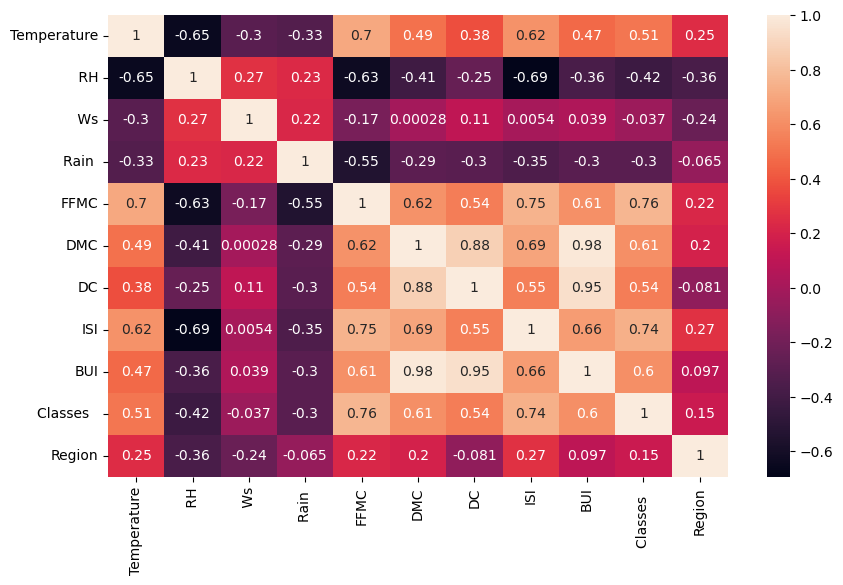

In [16]:
# check for multicollinearity
import seaborn as sns
plt.figure(figsize=(10,6))
cor=x_train.corr()
sns.heatmap(cor,annot=True)

In [17]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]>threshold):
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
            

In [18]:
# thresold----Domain expertise
corr_features=correlation(x_train,0.85)

In [19]:
x_train.drop(corr_features,axis=1,inplace=True)
x_train.shape

(181, 9)

In [20]:
x_test.drop(corr_features,axis=1,inplace=True)

In [21]:
x_test.shape

(61, 9)

In [22]:
# feature scaling or standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_sc=scaler.fit_transform(x_train)
x_test_sc=scaler.transform(x_test)

In [23]:
x_test_sc

array([[-0.29479293,  0.08128103, -0.16273045, -0.38599953,  0.65673744,
        -0.02441636,  0.2472733 ,  0.92029277, -0.98356052],
       [ 0.23878227, -0.5904937 , -0.88112584, -0.38599953,  0.76099672,
        -0.36805564,  0.41330153,  0.92029277, -0.98356052],
       [ 0.23878227, -0.99355854,  0.19646725, -0.38599953,  0.71929301,
        -0.52788787,  0.5081748 ,  0.92029277,  1.01671425],
       [ 0.77235746, -0.65767117,  0.55566494, -0.1480366 ,  0.20494724,
         0.49503837, -0.46427625,  0.92029277,  1.01671425],
       [-0.56158052,  0.1484585 , -0.52192814, -0.38599953,  0.5663794 ,
         0.11943264, -0.03734652,  0.92029277,  1.01671425],
       [ 0.77235746,  0.21563598, -0.16273045, -0.33840694,  0.3787127 ,
         1.45403172, -0.32196634,  0.92029277,  1.01671425],
       [ 1.83950785, -1.5981558 , -0.16273045, -0.29081436,  0.83745352,
         0.10344942,  0.84023126,  0.92029277,  1.01671425],
       [ 0.50556987, -1.39662338, -0.16273045,  0.42307441,  0

## Box plot to understand effect of standard scaler

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7016\2728966588.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'x_train after scaling')

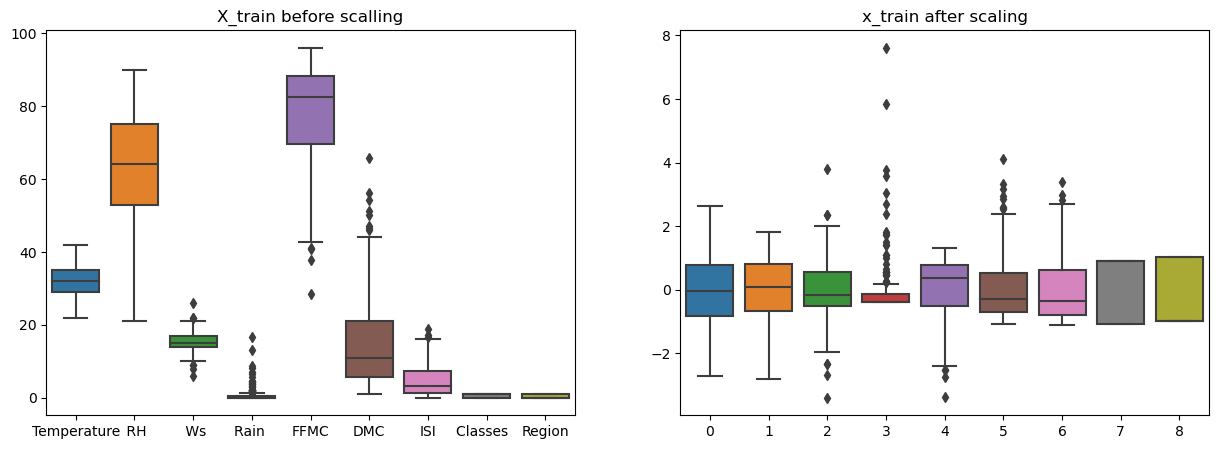

In [24]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title('X_train before scalling')
plt.subplot(1,2,2)
sns.boxplot(data=x_train_sc)
plt.title('x_train after scaling')

## Linear Regression Model

MAE : 0.5776072016024819
R2_score error : 0.9836685254556914


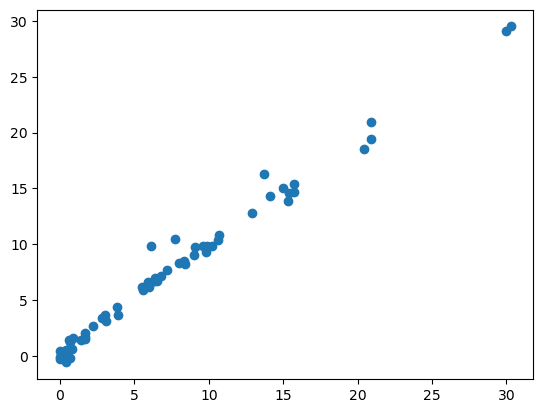

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
model=LinearRegression()
model.fit(x_train_sc,y_train)
y_pred=model.predict(x_test_sc)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("MAE :" ,mae)
print("R2_score error :",score)
plt.scatter(y_test,y_pred)

#### may be its couse overfitting
#### Lasso Regression

MAE : 1.145997996939169
R2_score error : 0.9497712193501187


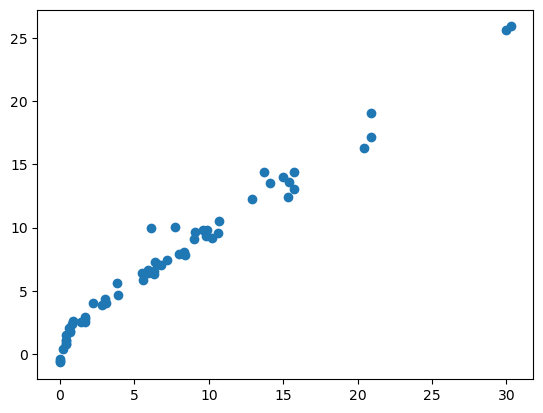

In [26]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,r2_score
model1=Lasso()
model1.fit(x_train_sc,y_train)
y_pred=model1.predict(x_test_sc)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("MAE :" ,mae)
print("R2_score error :",score)
plt.scatter(y_test,y_pred)

In [27]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(x_train_sc,y_train)

LassoCV(cv=5)

In [28]:
lassocv.alpha_

0.06481103951672902

In [29]:
lassocv.alphas_

array([6.94947533, 6.48110395, 6.04429924, 5.6369337 , 5.25702323,
       4.90271746, 4.57229071, 4.26413362, 3.97674529, 3.70872596,
       3.45877025, 3.22566071, 3.00826197, 2.80551518, 2.61643285,
       2.44009403, 2.27563986, 2.12226935, 1.9792355 , 1.84584165,
       1.7214381 , 1.60541894, 1.49721907, 1.39631152, 1.3022048 ,
       1.21444055, 1.13259132, 1.05625846, 0.98507017, 0.91867974,
       0.8567638 , 0.79902079, 0.74516946, 0.69494753, 0.6481104 ,
       0.60442992, 0.56369337, 0.52570232, 0.49027175, 0.45722907,
       0.42641336, 0.39767453, 0.3708726 , 0.34587702, 0.32256607,
       0.3008262 , 0.28055152, 0.26164329, 0.2440094 , 0.22756399,
       0.21222694, 0.19792355, 0.18458417, 0.17214381, 0.16054189,
       0.14972191, 0.13963115, 0.13022048, 0.12144406, 0.11325913,
       0.10562585, 0.09850702, 0.09186797, 0.08567638, 0.07990208,
       0.07451695, 0.06949475, 0.06481104, 0.06044299, 0.05636934,
       0.05257023, 0.04902717, 0.04572291, 0.04264134, 0.03976

In [30]:
lassocv.mse_path_

array([[54.83966454, 59.07855795, 38.72729712, 78.24916791, 53.00661707],
       [48.33127443, 52.98238939, 33.40705056, 76.17370919, 47.37592787],
       [42.489492  , 46.9476325 , 28.61641869, 69.11179183, 42.46600092],
       [37.38816074, 41.6222327 , 24.54198449, 62.88571919, 38.18380814],
       [32.93231013, 36.95463498, 21.08421335, 57.39228141, 33.53847098],
       [29.03908563, 32.86149181, 18.15701813, 52.54133041, 29.14966015],
       [25.63631212, 29.27011099, 15.68586523, 48.25410422, 25.34331445],
       [22.66140204, 26.11749884, 13.60632992, 43.16468118, 22.0425561 ],
       [20.05957707, 23.34834079, 11.86266757, 37.9874641 , 19.18168383],
       [17.78321296, 20.91452315, 10.40680285, 33.46741145, 16.70233718],
       [15.79082322, 18.77407566,  9.19714128, 29.52048402, 14.5542223 ],
       [14.0461701 , 16.89025254,  8.19780164, 26.07233474, 12.69363691],
       [12.51796119, 15.23137028,  7.37783328, 23.06047803, 11.08260866],
       [11.17864417, 13.76938633,  6.7

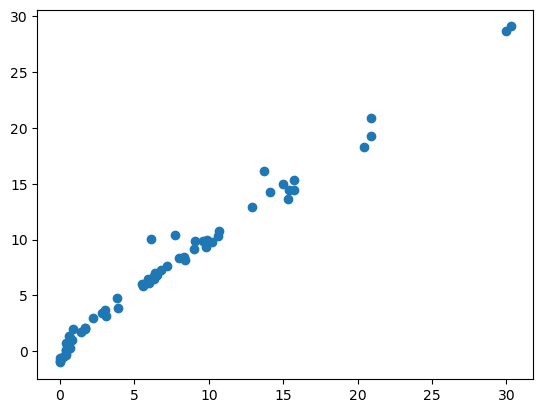

In [31]:
y_pred=lassocv.predict(x_test_sc)
plt.scatter(y_test,y_pred)

In [32]:
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("MAE :" ,mae)
print("R2_score error :",score)

MAE : 0.6622250709806292
R2_score error : 0.9809719622679341


#### Ridge Regression model

MAE : 0.6013524729812756
R2_score error : 0.9829234408923199


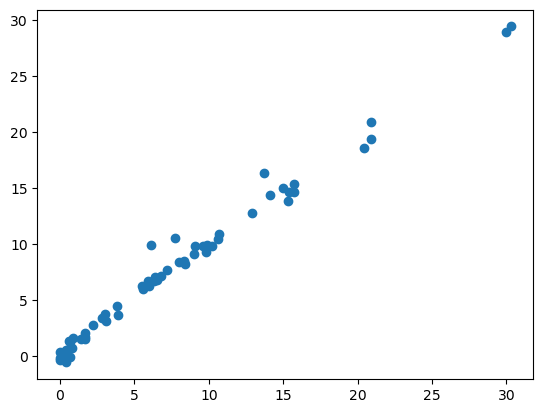

In [33]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,r2_score
model2=Ridge()
model2.fit(x_train_sc,y_train)
y_pred=model2.predict(x_test_sc)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("MAE :" ,mae)
print("R2_score error :",score)
plt.scatter(y_test,y_pred)

MAE : 0.6013524729812756
R2_score error : 0.9829234408923199


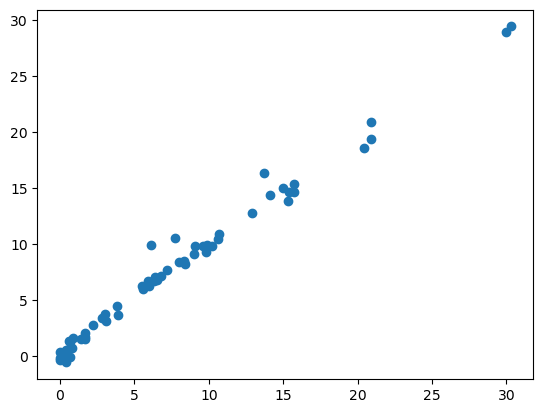

In [34]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(x_train_sc,y_train)
ridgecv.predict(x_test_sc)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("MAE :" ,mae)
print("R2_score error :",score)

#### Elastic net regression

MAE : 1.8649528388049723
R2_score error : 0.8743005798280058


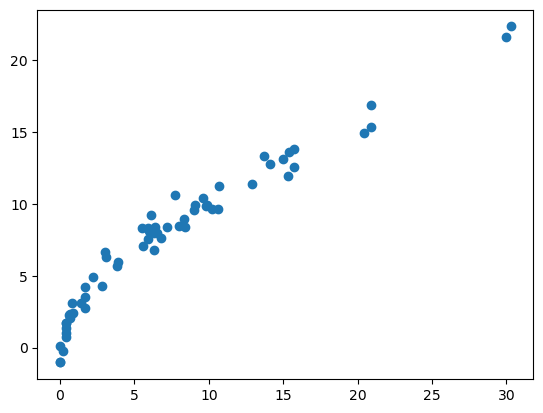

In [35]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,r2_score
model3=ElasticNet()
model3.fit(x_train_sc,y_train)
y_pred=model3.predict(x_test_sc)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("MAE :" ,mae)
print("R2_score error :",score)
plt.scatter(y_test,y_pred)

MAE : 1.8649528388049723
R2_score error : 0.8743005798280058


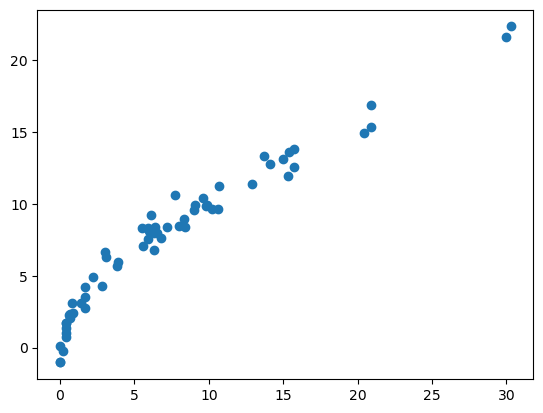

In [36]:
from sklearn.linear_model import ElasticNetCV
elncv=ElasticNetCV(cv=5)
elncv.fit(x_train_sc,y_train)
elncv.predict(x_test_sc)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("MAE :" ,mae)
print("R2_score error :",score)

In [37]:
elncv.alpha_

0.04880188067039494

In [38]:
elncv.alphas_

array([13.89895066, 12.9622079 , 12.08859847, 11.2738674 , 10.51404647,
        9.80543492,  9.14458143,  8.52826724,  7.95349058,  7.41745193,
        6.9175405 ,  6.45132142,  6.01652395,  5.61103037,  5.2328657 ,
        4.88018807,  4.55127972,  4.2445387 ,  3.958471  ,  3.6916833 ,
        3.44287621,  3.21083787,  2.99443815,  2.79262304,  2.60440959,
        2.4288811 ,  2.26518264,  2.11251691,  1.97014035,  1.83735948,
        1.7135276 ,  1.59804157,  1.49033892,  1.38989507,  1.29622079,
        1.20885985,  1.12738674,  1.05140465,  0.98054349,  0.91445814,
        0.85282672,  0.79534906,  0.74174519,  0.69175405,  0.64513214,
        0.60165239,  0.56110304,  0.52328657,  0.48801881,  0.45512797,
        0.42445387,  0.3958471 ,  0.36916833,  0.34428762,  0.32108379,
        0.29944381,  0.2792623 ,  0.26044096,  0.24288811,  0.22651826,
        0.21125169,  0.19701403,  0.18373595,  0.17135276,  0.15980416,
        0.14903389,  0.13898951,  0.12962208,  0.12088598,  0.11

In [ ]:
## pickle machine learning model,preprocessing model standardscaler

In [39]:
scaler

StandardScaler()

In [40]:
model2     # ridge

Ridge()

In [41]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(model1,open('ridge.pkl','wb'))